In [1]:
import sys 
print(sys.version)

3.5.2 |Anaconda 4.2.0 (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]


In [3]:
import pandas as pd 
import numpy as np
import gmaps

In [4]:
input_file = pd.read_csv("../pallabi.csv")
input_file.head()

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NAME,ACCOUNT_NO,METER_NO,ADDRESS,ZONE,BLOCK,ROUTE,LOAD,TARIFF,METER_STATUS,MONTH,YEAR,UNIT
0,HEAD MASTER KALSHI HIGH S,11313911,0000830099,11 E/DAG NO 3170 MIRPUR DHAKA,PLAF,110,10.0,2.0,D,Single,5,1999,1755.0
1,HEAD MASTER KALSHI HIGH S,11313911,0000830099,11 E/DAG NO 3170 MIRPUR DHAKA,PLAF,110,10.0,2.0,D,Single,6,1999,1615.0
2,HEAD MASTER KALSHI HIGH S,11313911,0000830099,11 E/DAG NO 3170 MIRPUR DHAKA,PLAF,110,10.0,2.0,D,Single,7,1999,375.0
3,HEAD MASTER KALSHI HIGH S,11313911,0000830099,11 E/DAG NO 3170 MIRPUR DHAKA,PLAF,110,10.0,2.0,D,Single,8,1999,375.0
4,HEAD MASTER KALSHI HIGH S,11313911,0000830099,11 E/DAG NO 3170 MIRPUR DHAKA,PLAF,110,10.0,2.0,D,Single,9,1999,350.0


In [5]:
input_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343235 entries, 0 to 4343234
Data columns (total 13 columns):
NAME            object
ACCOUNT_NO      int64
METER_NO        object
ADDRESS         object
ZONE            object
BLOCK           object
ROUTE           float64
LOAD            float64
TARIFF          object
METER_STATUS    object
MONTH           int64
YEAR            int64
UNIT            float64
dtypes: float64(3), int64(3), object(7)
memory usage: 430.8+ MB


In [6]:
input_file.isnull().sum()

NAME              0
ACCOUNT_NO        0
METER_NO        591
ADDRESS           0
ZONE              0
BLOCK             0
ROUTE             0
LOAD              0
TARIFF            0
METER_STATUS      0
MONTH             0
YEAR              0
UNIT              0
dtype: int64

In [7]:
input_file=input_file.dropna()

In [8]:
input_file.isnull().sum()

NAME            0
ACCOUNT_NO      0
METER_NO        0
ADDRESS         0
ZONE            0
BLOCK           0
ROUTE           0
LOAD            0
TARIFF          0
METER_STATUS    0
MONTH           0
YEAR            0
UNIT            0
dtype: int64

In [9]:
input_file.to_csv('../Pallabi_cleaned_without_nan_values.csv',index=False)

In [10]:
address = input_file.ADDRESS

In [11]:
address

0                              11 E/DAG NO 3170 MIRPUR DHAKA
1                              11 E/DAG NO 3170 MIRPUR DHAKA
2                              11 E/DAG NO 3170 MIRPUR DHAKA
3                              11 E/DAG NO 3170 MIRPUR DHAKA
4                              11 E/DAG NO 3170 MIRPUR DHAKA
5                              11 E/DAG NO 3170 MIRPUR DHAKA
6                              11 E/DAG NO 3170 MIRPUR DHAKA
7                              11 E/DAG NO 3170 MIRPUR DHAKA
8                              11 E/DAG NO 3170 MIRPUR DHAKA
9                              11 E/DAG NO 3170 MIRPUR DHAKA
10                             11 E/DAG NO 3170 MIRPUR DHAKA
11                             11 E/DAG NO 3170 MIRPUR DHAKA
12                             11 E/DAG NO 3170 MIRPUR DHAKA
13                             11 E/DAG NO 3170 MIRPUR DHAKA
14                             11 E/DAG NO 3170 MIRPUR DHAKA
15                             11 E/DAG NO 3170 MIRPUR DHAKA
16                      

In [12]:
pd.DataFrame(input_file.ADDRESS.unique()).to_csv("../address_pallabi.csv")

In [13]:
input_file.ROUTE.value_counts()

50.00      24284
60.00      23703
10.00      23014
120.00     22812
80.00      22766
150.00     22694
40.00      22413
90.00      22385
30.00      22201
130.00     22162
100.00     22140
170.00     21901
70.00      21863
140.00     21747
180.00     21606
200.00     21301
160.00     21110
20.00      20953
110.00     20778
210.00     20766
330.00     20296
190.00     20248
350.00     20127
340.00     20039
380.00     20021
440.00     19856
240.00     19848
250.00     19683
300.00     19620
400.00     19586
           ...  
10.35          1
10.28          1
645.10         1
10.24          1
2380.12        1
10.29          1
645.08         1
42.04          1
1371.01        1
645.06         1
1371.05        1
645.04         1
1600.14        1
42.05          1
1600.13        1
10.27          1
42.06          1
10.21          1
645.01         1
2380.06        1
10.32          1
10.25          1
526.03         1
1371.02        1
645.03         1
725.03         1
725.02         1
645.02        

In [14]:
input_file.MONTH.value_counts()

10    378478
9     375554
8     372755
7     369174
11    368805
6     366587
5     362951
4     358685
3     355480
2     347403
1     344251
12    342521
Name: MONTH, dtype: int64

In [15]:
input_file.YEAR.value_counts()

2015    443013
2016    440217
2014    387940
2013    342434
2012    306819
2011    276255
2010    270677
2009    257539
2008    238039
2007    218982
2006    199597
2005    185450
2004    172413
2003    155157
2002    138420
2001    122788
2000    111060
1999     75407
1998       422
201         12
216          2
212          1
Name: YEAR, dtype: int64

In [16]:
input_file.METER_STATUS.value_counts()

Child     2095236
Single    1518639
child      467636
check      137240
Check      123893
Name: METER_STATUS, dtype: int64

In [17]:
input_file.TARIFF.value_counts()

A     3841642
E      457323
C       15980
D       14150
F        6197
J        4886
A1       2160
A2        180
F1        126
Name: TARIFF, dtype: int64

In [18]:
input_file.ZONE.value_counts()

PLKL    977672
PLBD    541748
PLKA    503264
PLAF    476661
PLBG    400110
PLAH    389476
PLCR    379444
PLBA    249846
PLBP    195408
PLDE     83985
PLDP     76693
PLDW     68337
Name: ZONE, dtype: int64

In [19]:
input_file.BLOCK.value_counts()

150     125029
779     121265
140     117596
100     103179
110     101573
120      93880
777      91605
210      91259
170      85634
260      85171
130      79797
782      76034
500      75276
783      73015
151      72274
330      71458
781      70041
190      65410
180      64469
780      63313
784      58714
778      57065
200      54356
010      54339
250      53631
60       49232
50       47778
20       45203
290      45105
80       44126
         ...  
211       9656
020       9622
561       9099
111       8766
70        8349
341       6669
784       6651
707       6376
704       6367
703       6275
702       6241
700       6013
553       5850
563       5649
556       5519
CITY      5076
491       4650
131       4144
556       3690
RMT       3049
706       2843
710       2759
566       2635
564       2626
H01       2586
567       2561
WASA      2455
565       2037
CAMP      1993
558        679
Name: BLOCK, dtype: int64

In [20]:
import matplotlib.pyplot as plt

In [21]:
block_counts = input_file.BLOCK.value_counts()

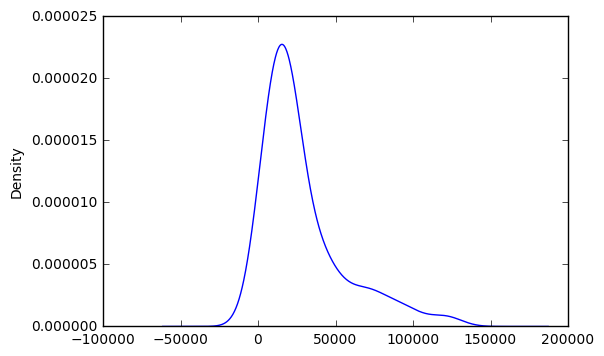

In [22]:
block_counts = input_file.BLOCK.value_counts()
block_counts.plot(kind='kde')
plt.show()

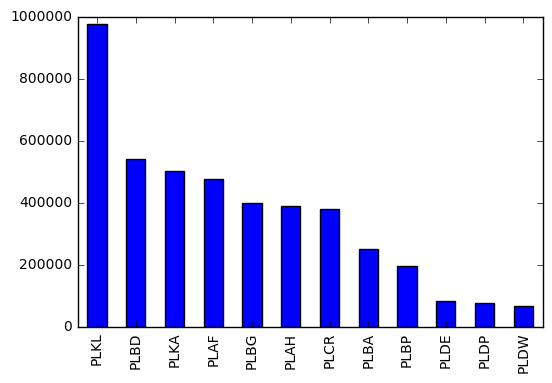

In [23]:
zone_counts = input_file.ZONE.value_counts()
zone_counts.plot(kind='bar')
plt.show()

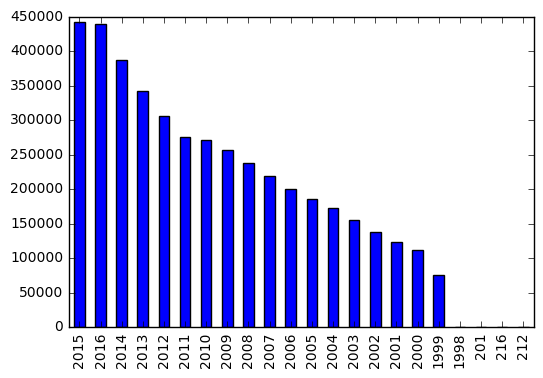

In [24]:
year_counts = input_file.YEAR.value_counts()
year_counts.plot(kind='bar')
plt.show()

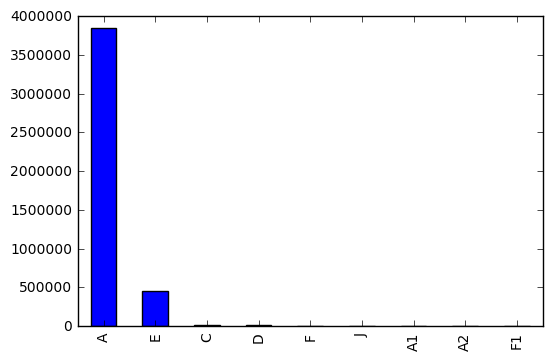

In [25]:
tarif_count = input_file.TARIFF.value_counts()
tarif_count.plot(kind='bar')
plt.show()

In [26]:
input_file['METER_STATUS'] =input_file['METER_STATUS'].apply(lambda x: x.upper() ) 
input_file.head()

,NAME,ACCOUNT_NO,METER_NO,ADDRESS,ZONE,BLOCK,ROUTE,LOAD,TARIFF,METER_STATUS,MONTH,YEAR,UNIT
0,HEAD MASTER KALSHI HIGH S,11313911,0000830099,11 E/DAG NO 3170 MIRPUR DHAKA,PLAF,110,10.0,2.0,D,SINGLE,5,1999,1755.0
1,HEAD MASTER KALSHI HIGH S,11313911,0000830099,11 E/DAG NO 3170 MIRPUR DHAKA,PLAF,110,10.0,2.0,D,SINGLE,6,1999,1615.0
2,HEAD MASTER KALSHI HIGH S,11313911,0000830099,11 E/DAG NO 3170 MIRPUR DHAKA,PLAF,110,10.0,2.0,D,SINGLE,7,1999,375.0
3,HEAD MASTER KALSHI HIGH S,11313911,0000830099,11 E/DAG NO 3170 MIRPUR DHAKA,PLAF,110,10.0,2.0,D,SINGLE,8,1999,375.0
4,HEAD MASTER KALSHI HIGH S,11313911,0000830099,11 E/DAG NO 3170 MIRPUR DHAKA,PLAF,110,10.0,2.0,D,SINGLE,9,1999,350.0


In [27]:
input_file.METER_STATUS.value_counts()

CHILD     2562872
SINGLE    1518639
CHECK      261133
Name: METER_STATUS, dtype: int64

In [28]:
pd.DataFrame(input_file.ADDRESS.unique()).to_csv("../address_pallabi.csv")

In [29]:
input_file.LOAD.value_counts()

2.00       3231448
1.00        317985
3.00        288079
4.00        165190
5.00         75834
8.00         65317
6.00         35231
10.00        34886
7.00         25997
12.00        17650
9.00         13782
11.00        10309
13.00         8791
15.00         7344
14.00         7105
20.00         5773
16.00         3927
30.00         3161
60.00         2250
18.00         2093
17.00         1963
40.00         1829
22.00         1657
25.00         1442
45.00         1404
23.00          819
80.00          663
35.00          661
32.00          616
24.00          608
            ...   
1000.00        209
56.00          203
140.00         189
90.00          164
88.00          130
130.00         125
118.00         122
155.00         112
31.00          106
200.00         103
252.00         103
59.00           99
150.00          98
51.00           93
43.00           91
400.00          87
105.00          75
34.00           70
66.00           64
120.00          51
268.00          49
170.00      